In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

path = './HACKATHON_BIG_DATA'
path_lojas_atuais = f'{path}/lojas_atuais.csv'
path_faturamento_lojas_atuais = f'{path}/faturamento_lojas_atuais.csv'
path_cenarios_expansao = f'{path}/cenarios_expansao.csv'

lojas = pd.read_csv(path_lojas_atuais)
faturamento = pd.read_csv(path_faturamento_lojas_atuais)
expansao = pd.read_csv(path_cenarios_expansao)


In [2]:
# Arrumando o dataset para ficar do jeito que vamos treinar 

In [3]:
path_ibge = 'tabelas_ibge_uteis/tabela392_csv.csv'

ibge = pd.read_csv(path_ibge, sep=';', encoding='latin1')

In [4]:
#ibge_values = ibge['ï»¿Areas'].values
#ibge.drop(['ï»¿Areas'], axis=1, inplace=True)
#ibge['Areas'] = pd.Series(ibge_values)
ibge.head()


,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11
0,Ariquemes,50 123,28 179,21 943,"1 207,58","1 349,38","1 025,48","700,00","800,00","510,00",1100023
1,Área 001,9 769,5 183,4 586,"1 822,21","2 167,50","1 432,02","1 000,00","1 200,00","800,00",1100023003001
2,Área 002,9 076,5 406,3 670,"1 131,17","1 323,46","847,90","650,00","800,00","510,00",1100023003002
3,Área 003,15 097,8 632,6 465,"829,98","939,79","683,35","550,00","693,00","510,00",1100023003003
4,Área 004,16 180,8 959,7 222,"1 231,68","1 286,37","1 163,84","700,00","800,00","510,00",1100023003004


In [5]:
ibge.columns
ibge = ibge.rename(columns={'Column5': 'renda_media', 'Column11': 'cod_ap'})
ibge.columns

Index(['Column1', 'Column2', 'Column3', 'Column4', 'renda_media', 'Column6',
       'Column7', 'Column8', 'Column9', 'Column10', 'cod_ap'],
      dtype='object')

In [6]:
ibge = ibge[['cod_ap', 'renda_media']]
ibge.head()
ibge.dtypes

cod_ap         object
renda_media    object
dtype: object

In [7]:
lojas.sample(30)

# IMPORTANTE -> FEATURES 13 a 15 ou todas estao presentes ou nenhuma esta presente -> tranformar em feature binaria posteriormente

,cod_loja,cod_ap,cod_municipio,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,...,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18
1943,2289,2704302004016,2704302,NaN,FEATURE_02_VALUE_03,False,70.58,FEATURE_05_VALUE_03,9,0.188255,...,461.353746,3.452449,NaN,NaN,100.0,95.3,100.0,100.0,85.0,93.7
659,767,4203006003003,4203006,FEATURE_01_VALUE_10,FEATURE_02_VALUE_02,False,50.00,FEATURE_05_VALUE_03,6,0.232903,...,28.568465,1.319052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1848,2179,4305454001001,4305454,NaN,FEATURE_02_VALUE_04,False,27.00,FEATURE_05_VALUE_03,3,0.146233,...,6.264975,13.985036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1784,2099,2914802005002,2914802,NaN,FEATURE_02_VALUE_06,False,30.00,FEATURE_05_VALUE_03,3,0.126779,...,86.487184,2.276038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1097,1277,2604106003003,2604106,NaN,FEATURE_02_VALUE_02,False,21.00,FEATURE_05_VALUE_02,3,0.146264,...,163.567629,2.016780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1847,2178,4204202003009,4204202,NaN,FEATURE_02_VALUE_06,False,41.50,FEATURE_05_VALUE_05,5,0.201033,...,91.060404,3.887364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
929,1078,5300108005001,5300108,FEATURE_01_VALUE_10,FEATURE_02_VALUE_04,True,40.00,FEATURE_05_VALUE_05,7,0.215967,...,1562.674817,3.670883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,779,2605004001001,2605004,NaN,FEATURE_02_VALUE_02,False,21.00,FEATURE_05_VALUE_03,6,0.094653,...,9.319790,4.194455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
967,1125,4205407005022,4205407,NaN,FEATURE_02_VALUE_03,False,28.93,FEATURE_05_VALUE_02,18,0.133368,...,302.266150,1.916157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
560,656,3518800005024,3518800,NaN,FEATURE_02_VALUE_03,False,64.95,FEATURE_05_VALUE_05,8,0.208767,...,551.935082,1.132263,NaN,NaN,100.0,96.4,0.0,100.0,88.1,92.0


In [8]:
lojas.isnull().sum()
print(lojas.dtypes)

cod_loja           int64
cod_ap             int64
cod_municipio      int64
feature_01        object
feature_02        object
feature_03          bool
feature_04       float64
feature_05        object
feature_06         int64
feature_07       float64
feature_08       float64
feature_09       float64
feature_10       float64
feature_11        object
feature_12        object
feature_13       float64
feature_14       float64
feature_15       float64
feature_16       float64
feature_17       float64
feature_18       float64
dtype: object


In [9]:
# mudar os types:

# observacao feat 12 e binaria na vdd mas vamos deixar assim, pq
# ainda teremos que lidar com missing values, entao ter 3 categorias
# na vdd
lojas['cod_loja'] = lojas['cod_loja'].astype(str)
lojas['cod_ap'] = lojas['cod_ap'].astype(str)
lojas['cod_municipio'] = lojas['cod_municipio'].astype(str)

In [10]:
print(lojas.shape)
print(lojas.info())
print(lojas.duplicated().any())

(3130, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3130 entries, 0 to 3129
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cod_loja       3130 non-null   object 
 1   cod_ap         3130 non-null   object 
 2   cod_municipio  3130 non-null   object 
 3   feature_01     1171 non-null   object 
 4   feature_02     3130 non-null   object 
 5   feature_03     3130 non-null   bool   
 6   feature_04     3130 non-null   float64
 7   feature_05     3130 non-null   object 
 8   feature_06     3130 non-null   int64  
 9   feature_07     3130 non-null   float64
 10  feature_08     3130 non-null   float64
 11  feature_09     3130 non-null   float64
 12  feature_10     3130 non-null   float64
 13  feature_11     245 non-null    object 
 14  feature_12     245 non-null    object 
 15  feature_13     874 non-null    float64
 16  feature_14     874 non-null    float64
 17  feature_15     874 non-null    float64
 1

In [11]:
#  lojas onde foi inputado -1 (nao se conhece dados geograficos)
lojas[lojas['cod_ap'] == '-1']

,cod_loja,cod_ap,cod_municipio,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,...,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18
178,3391,-1,-1,FEATURE_01_VALUE_10,FEATURE_02_VALUE_03,True,32.00,FEATURE_05_VALUE_06,6,0.107963,...,1355.486603,4.142294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
475,688,-1,-1,NaN,FEATURE_02_VALUE_04,False,34.50,FEATURE_05_VALUE_03,3,0.260188,...,6.502798,4.091820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
605,708,-1,-1,FEATURE_01_VALUE_08,FEATURE_02_VALUE_02,True,46.50,FEATURE_05_VALUE_07,4,0.168922,...,115.958848,2.349821,FEATURE_11_VALUE_01,FEATURE_12_VALUE_02,98.8,70.1,80.0,100.0,81.1,85.8
617,721,-1,-1,NaN,FEATURE_02_VALUE_04,True,35.30,FEATURE_05_VALUE_03,5,0.215967,...,1562.674817,3.670883,NaN,NaN,100.0,73.1,100.0,100.0,88.3,91.3
652,760,-1,-1,NaN,FEATURE_02_VALUE_03,False,48.04,FEATURE_05_VALUE_05,8,0.143917,...,201.530115,3.269826,NaN,NaN,100.0,83.8,0.0,100.0,94.8,92.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,3646,-1,-1,NaN,FEATURE_02_VALUE_03,True,33.30,FEATURE_05_VALUE_05,8,0.215967,...,1562.674817,3.670883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3099,3648,-1,-1,FEATURE_01_VALUE_08,FEATURE_02_VALUE_03,True,47.28,FEATURE_05_VALUE_05,5,0.215967,...,1562.674817,3.670883,FEATURE_11_VALUE_01,FEATURE_12_VALUE_01,NaN,NaN,NaN,NaN,NaN,NaN
3101,3651,-1,-1,FEATURE_01_VALUE_10,FEATURE_02_VALUE_04,True,28.34,FEATURE_05_VALUE_03,3,0.215967,...,1562.674817,3.670883,FEATURE_11_VALUE_06,FEATURE_12_VALUE_01,NaN,NaN,NaN,NaN,NaN,NaN
3106,3657,-1,-1,FEATURE_01_VALUE_03,FEATURE_02_VALUE_06,True,12.00,FEATURE_05_VALUE_06,0,0.107963,...,106.561828,2.439713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
faturamento.head(15)

,cod_loja,ano,mes,categoria,qtde,receita
0,1,2016,1,CATEG_01,301.0,9164.86
1,1,2016,2,CATEG_01,187.0,8175.55
2,1,2016,3,CATEG_01,242.0,10521.67
3,1,2016,4,CATEG_01,104.0,4560.91
4,1,2016,5,CATEG_01,100.0,4263.30
5,1,2016,6,CATEG_01,108.0,4741.36
6,1,2016,7,CATEG_01,111.0,5604.77
7,1,2016,8,CATEG_01,86.0,3987.35
8,1,2016,9,CATEG_01,148.0,5543.12
9,1,2016,10,CATEG_01,147.0,4996.06


In [13]:
print(faturamento.shape)
print(faturamento.info())
print(faturamento.duplicated().any())

(1003094, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003094 entries, 0 to 1003093
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   cod_loja   1003094 non-null  int64  
 1   ano        1003094 non-null  int64  
 2   mes        1003094 non-null  int64  
 3   categoria  1003094 non-null  object 
 4   qtde       1003094 non-null  float64
 5   receita    1003094 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 45.9+ MB
None
False


In [14]:
expansao.head()

,cod_loja,cod_ap,cod_municipio,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,...,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18
0,10,2933307005008,2933307,FEATURE_01_VALUE_08,FEATURE_02_VALUE_02,False,50.00,FEATURE_05_VALUE_03,6,0.134654,...,116.194058,2.913498,FEATURE_11_VALUE_01,FEATURE_12_VALUE_01,100.0,93.4,100.0,100.0,71.7,88.8
1,13,2916401003002,2916401,FEATURE_01_VALUE_10,FEATURE_02_VALUE_04,False,41.00,FEATURE_05_VALUE_03,4,0.116662,...,26.345742,1.312612,NaN,NaN,84.3,77.5,100.0,100.0,63.5,78.8
2,16,2928703003003,2928703,NaN,FEATURE_02_VALUE_04,False,42.12,FEATURE_05_VALUE_05,2,0.104162,...,35.362788,1.969512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21,2906006003001,2906006,NaN,FEATURE_02_VALUE_04,False,30.00,FEATURE_05_VALUE_03,6,0.132954,...,9.862757,1.383681,NaN,NaN,85.0,76.9,100.0,100.0,100.0,92.9
4,28,3550308005058,3550308,FEATURE_01_VALUE_10,FEATURE_02_VALUE_02,True,44.31,FEATURE_05_VALUE_03,8,0.190102,...,5593.905463,2.815883,FEATURE_11_VALUE_02,FEATURE_12_VALUE_01,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
print(expansao.shape)
print(expansao.info())
print(expansao.duplicated().any())

(553, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cod_loja       553 non-null    int64  
 1   cod_ap         553 non-null    int64  
 2   cod_municipio  553 non-null    int64  
 3   feature_01     189 non-null    object 
 4   feature_02     553 non-null    object 
 5   feature_03     553 non-null    bool   
 6   feature_04     553 non-null    float64
 7   feature_05     553 non-null    object 
 8   feature_06     553 non-null    int64  
 9   feature_07     553 non-null    float64
 10  feature_08     553 non-null    float64
 11  feature_09     553 non-null    float64
 12  feature_10     553 non-null    float64
 13  feature_11     41 non-null     object 
 14  feature_12     41 non-null     object 
 15  feature_13     159 non-null    float64
 16  feature_14     159 non-null    float64
 17  feature_15     159 non-null    float64
 18  

In [16]:
faturamento['cod_loja'].nunique() 

3130

In [17]:
len(lojas)

3130

In [18]:
len(expansao)

553

In [19]:
faturamento.isnull().values.any()

False

In [20]:
faturamento.describe()

,cod_loja,ano,mes,qtde,receita
count,1.003094e+06,1.003094e+06,1.003094e+06,1.003094e+06,1.003094e+06
mean,1.801101e+03,2.016502e+03,6.511972e+00,2.043899e+02,9.334457e+03
std,1.054476e+03,4.999960e-01,3.454766e+00,3.482261e+02,2.367026e+04
min,1.000000e+00,2.016000e+03,1.000000e+00,0.000000e+00,0.000000e+00
25%,8.830000e+02,2.016000e+03,4.000000e+00,2.000000e+01,6.005375e+02
50%,1.784000e+03,2.017000e+03,7.000000e+00,7.700000e+01,2.252815e+03
75%,2.711000e+03,2.017000e+03,1.000000e+01,2.490000e+02,7.675568e+03
max,3.687000e+03,2.017000e+03,1.200000e+01,1.216000e+04,9.751064e+05


In [21]:
faturamento.head()

,cod_loja,ano,mes,categoria,qtde,receita
0,1,2016,1,CATEG_01,301.0,9164.86
1,1,2016,2,CATEG_01,187.0,8175.55
2,1,2016,3,CATEG_01,242.0,10521.67
3,1,2016,4,CATEG_01,104.0,4560.91
4,1,2016,5,CATEG_01,100.0,4263.30


In [22]:
# colocar as categorias para cada mes

cat_concat_list = []
loja_ano_mes_cont_list = []
i = 0
for ((cod_loja, ano, mes), gp) in faturamento.groupby(['cod_loja', 'ano', 'mes']):
    month_categories = pd.Series(gp['qtde'].values, index=gp['categoria'].values).to_dict()
    cat_df = pd.DataFrame(month_categories, index=[i])
    cat_concat_list.append(cat_df)
    loja_ano_mes_cont_list.append({'cod_loja':cod_loja, 'ano':ano, 'mes':mes})
    i += 1 
cat_full = pd.concat([*cat_concat_list])
loja_ano_mes_cont_full = pd.DataFrame(loja_ano_mes_cont_list)
loja_ano_mes_cont_full.head(10)


,cod_loja,ano,mes
0,1,2016,1
1,1,2016,2
2,1,2016,3
3,1,2016,4
4,1,2016,5
5,1,2016,6
6,1,2016,7
7,1,2016,8
8,1,2016,9
9,1,2016,10


In [23]:
loja_ano_mes_cont_full.shape

(73644, 3)

In [24]:
cat_full.shape

(73644, 16)

In [25]:
faturamento = faturamento.groupby(['cod_loja', 'ano', 'mes'])[['qtde', 'receita']].sum().reset_index(drop = True)
faturamento.shape

(73644, 2)

In [26]:
faturamento = pd.concat([loja_ano_mes_cont_full, faturamento, cat_full], axis=1)
faturamento.shape

(73644, 21)

In [27]:
faturamento.head()

,cod_loja,ano,mes,qtde,receita,CATEG_01,CATEG_02,CATEG_03,CATEG_04,CATEG_05,...,CATEG_07,CATEG_08,CATEG_09,CATEG_10,CATEG_11,CATEG_12,CATEG_13,CATEG_14,CATEG_15,CATEG_16
0,1,2016,1,13034.0,441833.37,301.0,137.0,1469.0,251.0,1155.0,...,1424.0,139.0,1357.0,273.0,3820.0,1846.0,288.0,24.0,NaN,NaN
1,1,2016,2,11411.0,395340.22,187.0,193.0,1579.0,215.0,1213.0,...,1153.0,135.0,1461.0,356.0,2637.0,1633.0,262.0,24.0,NaN,NaN
2,1,2016,3,15030.0,587810.18,242.0,71.0,1935.0,280.0,1460.0,...,1639.0,296.0,2270.0,428.0,4251.0,1526.0,145.0,320.0,NaN,NaN
3,1,2016,4,12726.0,534618.84,104.0,74.0,1466.0,304.0,1356.0,...,1405.0,547.0,1644.0,413.0,3688.0,1384.0,190.0,7.0,NaN,NaN
4,1,2016,5,13978.0,595477.92,100.0,84.0,1576.0,308.0,1777.0,...,1194.0,422.0,1682.0,509.0,4345.0,1537.0,107.0,146.0,NaN,NaN


In [28]:
# todas as combinacoes possiveis de loja, ano, mes
# garantir que nao vai faltar nada

from itertools import product

loja_unique = faturamento['cod_loja'].unique()
ano_unique = faturamento['ano'].unique()
mes_unique = faturamento['mes'].unique()

all_combinations = np.vstack(list(product(loja_unique, ano_unique, mes_unique)))

combinations_faturamento = pd.DataFrame(all_combinations, columns=['cod_loja', 'ano', 'mes'])

In [29]:
combinations_faturamento = combinations_faturamento.sort_values(by=['cod_loja', 'ano', 'mes'])

In [30]:
faturamento = pd.merge(faturamento, combinations_faturamento, on=['cod_loja', 'ano', 'mes'], how='right')

In [31]:
faturamento.head()

,cod_loja,ano,mes,qtde,receita,CATEG_01,CATEG_02,CATEG_03,CATEG_04,CATEG_05,...,CATEG_07,CATEG_08,CATEG_09,CATEG_10,CATEG_11,CATEG_12,CATEG_13,CATEG_14,CATEG_15,CATEG_16
0,1,2016,1,13034.0,441833.37,301.0,137.0,1469.0,251.0,1155.0,...,1424.0,139.0,1357.0,273.0,3820.0,1846.0,288.0,24.0,NaN,NaN
1,1,2016,2,11411.0,395340.22,187.0,193.0,1579.0,215.0,1213.0,...,1153.0,135.0,1461.0,356.0,2637.0,1633.0,262.0,24.0,NaN,NaN
2,1,2016,3,15030.0,587810.18,242.0,71.0,1935.0,280.0,1460.0,...,1639.0,296.0,2270.0,428.0,4251.0,1526.0,145.0,320.0,NaN,NaN
3,1,2016,4,12726.0,534618.84,104.0,74.0,1466.0,304.0,1356.0,...,1405.0,547.0,1644.0,413.0,3688.0,1384.0,190.0,7.0,NaN,NaN
4,1,2016,5,13978.0,595477.92,100.0,84.0,1576.0,308.0,1777.0,...,1194.0,422.0,1682.0,509.0,4345.0,1537.0,107.0,146.0,NaN,NaN


In [32]:
faturamento.loc[faturamento['ano'] == 2016, 'mes_cont'] = faturamento.loc[faturamento['ano'] == 2016, 'mes']
faturamento.loc[faturamento['ano'] == 2017, 'mes_cont'] = 12 + faturamento.loc[faturamento['ano'] == 2017, 'mes']

In [33]:
print(faturamento['CATEG_08'].max())
print(faturamento['CATEG_08'].mean())
print(faturamento['CATEG_07'].max())
print(faturamento['CATEG_07'].mean())
print(faturamento['CATEG_06'].max())
print(faturamento['CATEG_06'].mean())
print(faturamento['CATEG_05'].max())
print(faturamento['CATEG_05'].mean())
print(faturamento['CATEG_04'].max())
print(faturamento['CATEG_04'].mean())
print(faturamento['CATEG_03'].max())
print(faturamento['CATEG_03'].mean())
print(faturamento['CATEG_02'].max())
print(faturamento['CATEG_02'].mean())
print(faturamento['CATEG_01'].max())
print(faturamento['CATEG_01'].mean())

2775.0
86.58908660195232
4639.0
347.8516858815062
606.0
28.146539320607864
8728.0
407.18681930525
1270.0
42.09782667975567
3199.0
152.8395371891848
193.0
5.058140857890545
1012.0
33.2709123141961


In [34]:
faturamento['cod_loja'] = faturamento['cod_loja'].astype(str)

In [35]:
faturamento = pd.merge(faturamento, lojas, on='cod_loja', how='inner')
faturamento.head(12)

,cod_loja,ano,mes,qtde,receita,CATEG_01,CATEG_02,CATEG_03,CATEG_04,CATEG_05,...,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18
0,1,2016,1,13034.0,441833.37,301.0,137.0,1469.0,251.0,1155.0,...,115.958848,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2016,2,11411.0,395340.22,187.0,193.0,1579.0,215.0,1213.0,...,115.958848,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2016,3,15030.0,587810.18,242.0,71.0,1935.0,280.0,1460.0,...,115.958848,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2016,4,12726.0,534618.84,104.0,74.0,1466.0,304.0,1356.0,...,115.958848,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2016,5,13978.0,595477.92,100.0,84.0,1576.0,308.0,1777.0,...,115.958848,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,2016,6,14693.0,589947.05,108.0,96.0,1726.0,327.0,1599.0,...,115.958848,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,2016,7,13570.0,563814.03,111.0,90.0,1553.0,325.0,1329.0,...,115.958848,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,2016,8,13889.0,625181.36,86.0,81.0,1667.0,504.0,1238.0,...,115.958848,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,2016,9,13309.0,583509.12,148.0,90.0,1426.0,295.0,1374.0,...,115.958848,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,2016,10,14709.0,611797.30,147.0,79.0,1702.0,315.0,1983.0,...,115.958848,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
faturamento.shape

(75120, 42)

In [37]:
faturamento.isnull().sum()

cod_loja             0
ano                  0
mes                  0
qtde              1476
receita           1476
CATEG_01          1790
CATEG_02         22386
CATEG_03          1483
CATEG_04          1776
CATEG_05          1482
CATEG_06          2143
CATEG_07          1479
CATEG_08          1669
CATEG_09          1481
CATEG_10          1529
CATEG_11          1481
CATEG_12          1483
CATEG_13          4153
CATEG_14          5189
CATEG_15         74184
CATEG_16         75118
mes_cont             0
cod_ap               0
cod_municipio        0
feature_01       47016
feature_02           0
feature_03           0
feature_04           0
feature_05           0
feature_06           0
feature_07           0
feature_08           0
feature_09           0
feature_10           0
feature_11       69240
feature_12       69240
feature_13       54144
feature_14       54144
feature_15       54144
feature_16       54144
feature_17       54144
feature_18       54144
dtype: int64

In [38]:
faturamento['cod_ap'] = faturamento['cod_ap'].astype(str)

In [39]:
faturamento = pd.merge(faturamento, ibge, on='cod_ap', how='left')
faturamento.head(20)

,cod_loja,ano,mes,qtde,receita,CATEG_01,CATEG_02,CATEG_03,CATEG_04,CATEG_05,...,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,renda_media
0,1,2016,1,13034.0,441833.37,301.0,137.0,1469.0,251.0,1155.0,...,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1 429,93"
1,1,2016,2,11411.0,395340.22,187.0,193.0,1579.0,215.0,1213.0,...,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1 429,93"
2,1,2016,3,15030.0,587810.18,242.0,71.0,1935.0,280.0,1460.0,...,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1 429,93"
3,1,2016,4,12726.0,534618.84,104.0,74.0,1466.0,304.0,1356.0,...,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1 429,93"
4,1,2016,5,13978.0,595477.92,100.0,84.0,1576.0,308.0,1777.0,...,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1 429,93"
5,1,2016,6,14693.0,589947.05,108.0,96.0,1726.0,327.0,1599.0,...,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1 429,93"
6,1,2016,7,13570.0,563814.03,111.0,90.0,1553.0,325.0,1329.0,...,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1 429,93"
7,1,2016,8,13889.0,625181.36,86.0,81.0,1667.0,504.0,1238.0,...,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1 429,93"
8,1,2016,9,13309.0,583509.12,148.0,90.0,1426.0,295.0,1374.0,...,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1 429,93"
9,1,2016,10,14709.0,611797.30,147.0,79.0,1702.0,315.0,1983.0,...,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1 429,93"


In [40]:
faturamento.isnull().sum()

cod_loja             0
ano                  0
mes                  0
qtde              1476
receita           1476
CATEG_01          1790
CATEG_02         22386
CATEG_03          1483
CATEG_04          1776
CATEG_05          1482
CATEG_06          2143
CATEG_07          1479
CATEG_08          1669
CATEG_09          1481
CATEG_10          1529
CATEG_11          1481
CATEG_12          1483
CATEG_13          4153
CATEG_14          5189
CATEG_15         74184
CATEG_16         75118
mes_cont             0
cod_ap               0
cod_municipio        0
feature_01       47016
feature_02           0
feature_03           0
feature_04           0
feature_05           0
feature_06           0
feature_07           0
feature_08           0
feature_09           0
feature_10           0
feature_11       69240
feature_12       69240
feature_13       54144
feature_14       54144
feature_15       54144
feature_16       54144
feature_17       54144
feature_18       54144
renda_media      18072
dtype: int6

In [41]:
faturamento.dtypes

cod_loja          object
ano                int64
mes                int64
qtde             float64
receita          float64
CATEG_01         float64
CATEG_02         float64
CATEG_03         float64
CATEG_04         float64
CATEG_05         float64
CATEG_06         float64
CATEG_07         float64
CATEG_08         float64
CATEG_09         float64
CATEG_10         float64
CATEG_11         float64
CATEG_12         float64
CATEG_13         float64
CATEG_14         float64
CATEG_15         float64
CATEG_16         float64
mes_cont         float64
cod_ap            object
cod_municipio     object
feature_01        object
feature_02        object
feature_03          bool
feature_04       float64
feature_05        object
feature_06         int64
feature_07       float64
feature_08       float64
feature_09       float64
feature_10       float64
feature_11        object
feature_12        object
feature_13       float64
feature_14       float64
feature_15       float64
feature_16       float64


In [42]:
faturamento.shape

(75120, 43)

In [43]:
faturamento['cod_ap'].nunique()

2349

In [44]:
faturamento['cod_municipio'].nunique()

1489

In [45]:
faturamento['renda_media'] = faturamento['renda_media'].astype(str).str.translate({32:None, 44:46}).astype(float)
faturamento['ano'] = faturamento['ano'].astype(str)
faturamento['mes'] = faturamento['mes'].astype(str)
faturamento.dtypes

cod_loja          object
ano               object
mes               object
qtde             float64
receita          float64
CATEG_01         float64
CATEG_02         float64
CATEG_03         float64
CATEG_04         float64
CATEG_05         float64
CATEG_06         float64
CATEG_07         float64
CATEG_08         float64
CATEG_09         float64
CATEG_10         float64
CATEG_11         float64
CATEG_12         float64
CATEG_13         float64
CATEG_14         float64
CATEG_15         float64
CATEG_16         float64
mes_cont         float64
cod_ap            object
cod_municipio     object
feature_01        object
feature_02        object
feature_03          bool
feature_04       float64
feature_05        object
feature_06         int64
feature_07       float64
feature_08       float64
feature_09       float64
feature_10       float64
feature_11        object
feature_12        object
feature_13       float64
feature_14       float64
feature_15       float64
feature_16       float64


In [46]:
# estado

cod_estado = faturamento['cod_municipio'].astype('str').str[:2]
cod_estado = cod_estado.replace({'11' : 'RO', '12' : 'AC', '13' : 'AM', '14' : 'RR', '15' : 'PA',
                                 '16' : 'AP', '17' : 'TO', '21' : 'MA', '22' : 'PI', '23' : 'CE',
                                 '24' : 'RN', '25' : 'PB', '26' : 'PE', '27' : 'AL', '28' : 'SE',
                                 '29' : 'BA', '31' : 'MG', '32' : 'ES', '33' : 'RJ', '35' : 'SP',
                                 '41' : 'PR', '42' : 'SC', '43' : 'RS', '50' : 'MS', '51' : 'MT',
                                 '52' : 'GO', '53' : 'DF'})
faturamento['estado'] =  cod_estado

# regiao 

cod_regiao = faturamento['estado'].astype('str').str[:2]
cod_regiao = cod_regiao.replace({'RO' : 'NT', 'AC' : 'NT', 'AM' : 'NT', 'RR' : 'NT', 'PA' : 'NT',
                                 'AP' : 'NT', 'TO' : 'NT', 'MA' : 'NE', 'PI' : 'NE', 'CE' : 'NE',
                                 'RN' : 'NE', 'PB' : 'NE', 'PE' : 'NE', 'AL' : 'NE', 'SE' : 'NE',
                                 'BA' : 'NE', 'MG' : 'SD', 'ES' : 'SD', 'RJ' : 'SD', 'PR' : 'SU',
                                 'SC' : 'SU', 'RS' : 'SU', 'MS' : 'CO', 'MT' : 'CO', 'MS' : 'CO',
                                 'GO' : 'CO', 'DF' : 'CO'})
faturamento['regiao'] =  cod_regiao


In [47]:
faturamento.head(15)

,cod_loja,ano,mes,qtde,receita,CATEG_01,CATEG_02,CATEG_03,CATEG_04,CATEG_05,...,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,renda_media,estado,regiao
0,1,2016,1,13034.0,441833.37,301.0,137.0,1469.0,251.0,1155.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1429.93,PR,SU
1,1,2016,2,11411.0,395340.22,187.0,193.0,1579.0,215.0,1213.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1429.93,PR,SU
2,1,2016,3,15030.0,587810.18,242.0,71.0,1935.0,280.0,1460.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1429.93,PR,SU
3,1,2016,4,12726.0,534618.84,104.0,74.0,1466.0,304.0,1356.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1429.93,PR,SU
4,1,2016,5,13978.0,595477.92,100.0,84.0,1576.0,308.0,1777.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1429.93,PR,SU
5,1,2016,6,14693.0,589947.05,108.0,96.0,1726.0,327.0,1599.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1429.93,PR,SU
6,1,2016,7,13570.0,563814.03,111.0,90.0,1553.0,325.0,1329.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1429.93,PR,SU
7,1,2016,8,13889.0,625181.36,86.0,81.0,1667.0,504.0,1238.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1429.93,PR,SU
8,1,2016,9,13309.0,583509.12,148.0,90.0,1426.0,295.0,1374.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1429.93,PR,SU
9,1,2016,10,14709.0,611797.30,147.0,79.0,1702.0,315.0,1983.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1429.93,PR,SU


In [48]:
localidades = pd.read_csv('localidades.csv', sep=';', encoding='latin1')

In [49]:
localidades.head(10)

,CD_GEOCODIGO,TIPO,CD_GEOCODBA,NM_BAIRRO,CD_GEOCODSD,NM_SUBDISTRITO,CD_GEOCODDS,NM_DISTRITO,CD_GEOCODMU,NM_MUNICIPIO,...,NM_MESO,NM_UF,CD_NIVEL,CD_CATEGORIA,NM_CATEGORIA,NM_LOCALIDADE,LONG,LAT,ALT,GM_PONTO_sk
0,110001505000001,URBANO,1.100015e+11,Redondo,11000150500,NaN,110001505,ALTA FLORESTA D'OESTE,1100015,ALTA FLORESTA D'OESTE,...,LESTE RONDONIENSE,RONDÔNIA,1,5,CIDADE,ALTA FLORESTA D'OESTE,"-61,9998239","-11,9355403","337,735719",1J6+^YP=gnhf
1,110001515000001,URBANO,NaN,NaN,11000151500,NaN,110001515,FILADÉLFIA D'OESTE,1100015,ALTA FLORESTA D'OESTE,...,LESTE RONDONIENSE,RONDÔNIA,2,15,VILA,FILADÉLFIA D'OESTE,"-62,04389767","-12,43723873","215,244429",1J6+gStX@d?>
2,110001520000001,URBANO,NaN,NaN,11000152000,NaN,110001520,IZIDOLÂNDIA,1100015,ALTA FLORESTA D'OESTE,...,LESTE RONDONIENSE,RONDÔNIA,2,20,VILA,IZIDOLÂNDIA,"-62,17554949","-12,60141549","181,044807",1J6+gwlc:Gtp
3,110001525000001,URBANO,NaN,NaN,11000152500,NaN,110001525,NOVA GEASE D'OESTE,1100015,ALTA FLORESTA D'OESTE,...,LESTE RONDONIENSE,RONDÔNIA,2,25,VILA,NOVA GEASE D'OESTE,"-62,31865014","-11,91979246","191,576571",1J6+^nhO?byf
4,110001530000001,URBANO,NaN,NaN,11000153000,NaN,110001530,ROLIM DE MOURA DO GUAPORÉ,1100015,ALTA FLORESTA D'OESTE,...,LESTE RONDONIENSE,RONDÔNIA,2,30,VILA,ROLIM DE MOURA DO GUAPORÉ,"-62,27681227","-13,07980643","157,285277",1J6+Hn4dy6Y-
5,110001535000001,URBANO,NaN,NaN,11000153500,NaN,110001535,SANTO ANTÔNIO D'OESTE,1100015,ALTA FLORESTA D'OESTE,...,LESTE RONDONIENSE,RONDÔNIA,2,35,VILA,SANTO ANTÔNIO D'OESTE,"-62,10442834","-12,08943882","407,707855",1J6+g2mLy)Tf
6,110002305000001,URBANO,NaN,NaN,11000230500,NaN,110002305,ARIQUEMES,1100023,ARIQUEMES,...,LESTE RONDONIENSE,RONDÔNIA,1,5,CIDADE,ARIQUEMES,"-63,03326928","-9,908462867","138,688981",1J6{7^Xi:vOp
7,110003105000001,URBANO,NaN,NaN,11000310500,NaN,110003105,CABIXI,1100031,CABIXI,...,LESTE RONDONIENSE,RONDÔNIA,1,5,CIDADE,CABIXI,"-60,54431358","-13,49976346","236,06316",1J6+O_Y;K@z>
8,110003105000008,RURAL,NaN,NaN,11000310500,NaN,110003105,CABIXI,1100031,CABIXI,...,LESTE RONDONIENSE,RONDÔNIA,3,1,POVOADO,PLANALTO SÃO LUIZ,"-60,41520649","-13,37444677","264,992801",1J6+O+1hOWX-
9,110004905000001,URBANO,1.100049e+11,Princesa Isabel,11000490500,NaN,110004905,CACOAL,1100049,CACOAL,...,LESTE RONDONIENSE,RONDÔNIA,1,5,CIDADE,CACOAL,"-61,44294421","-11,43386503","177,453547",1J6+_2d21Tif


In [50]:
localidades.dtypes

CD_GEOCODIGO        int64
TIPO               object
CD_GEOCODBA       float64
NM_BAIRRO          object
CD_GEOCODSD         int64
NM_SUBDISTRITO     object
CD_GEOCODDS         int64
NM_DISTRITO        object
CD_GEOCODMU         int64
NM_MUNICIPIO       object
NM_MICRO           object
NM_MESO            object
NM_UF              object
CD_NIVEL            int64
CD_CATEGORIA        int64
NM_CATEGORIA       object
NM_LOCALIDADE      object
LONG               object
LAT                object
ALT                object
GM_PONTO_sk        object
dtype: object

In [51]:
localidades = localidades.rename(columns={'CD_GEOCODSD': 'cod_municipio', 'LONG': 'long', 'LAT': 'lat' })
localidades = localidades.loc[:, ['cod_municipio', 'long', 'lat']]
# cod muicipio vem com trailing zeros
localidades['cod_municipio'] = localidades['cod_municipio'].astype(str).str[:7]
localidades['lat'] = localidades['lat'].astype(str).str.translate({32:None, 44:46}).astype(float)
localidades['long'] = localidades['long'].astype(str).str.translate({32:None, 44:46}).astype(float)

In [52]:
localidades.head()

,cod_municipio,long,lat
0,1100015,-61.999824,-11.935540
1,1100015,-62.043898,-12.437239
2,1100015,-62.175549,-12.601415
3,1100015,-62.318650,-11.919792
4,1100015,-62.276812,-13.079806


In [53]:
# pegando a media de latitude e longitude das areas como aproximacao do muncipiio
localidades = localidades.groupby('cod_municipio').mean()
localidades.head()

,long,lat
cod_municipio,,
1100015,-62.153194,-12.343872
1100023,-63.033269,-9.908463
1100031,-60.479760,-13.437105
1100049,-61.312022,-11.225933
1100056,-60.818426,-13.195033


In [54]:
# latitude e longitude por municipio
faturamento = pd.merge(faturamento, localidades, on='cod_municipio', how='left')
faturamento.head()

,cod_loja,ano,mes,qtde,receita,CATEG_01,CATEG_02,CATEG_03,CATEG_04,CATEG_05,...,feature_14,feature_15,feature_16,feature_17,feature_18,renda_media,estado,regiao,long,lat
0,1,2016,1,13034.0,441833.37,301.0,137.0,1469.0,251.0,1155.0,...,NaN,NaN,NaN,NaN,NaN,1429.93,PR,SU,-49.170762,-25.589919
1,1,2016,2,11411.0,395340.22,187.0,193.0,1579.0,215.0,1213.0,...,NaN,NaN,NaN,NaN,NaN,1429.93,PR,SU,-49.170762,-25.589919
2,1,2016,3,15030.0,587810.18,242.0,71.0,1935.0,280.0,1460.0,...,NaN,NaN,NaN,NaN,NaN,1429.93,PR,SU,-49.170762,-25.589919
3,1,2016,4,12726.0,534618.84,104.0,74.0,1466.0,304.0,1356.0,...,NaN,NaN,NaN,NaN,NaN,1429.93,PR,SU,-49.170762,-25.589919
4,1,2016,5,13978.0,595477.92,100.0,84.0,1576.0,308.0,1777.0,...,NaN,NaN,NaN,NaN,NaN,1429.93,PR,SU,-49.170762,-25.589919


In [55]:
percent_missing = faturamento.isnull().sum() * 100 / len(faturamento)
missing_value_df = pd.DataFrame({'column_name': faturamento.columns,
                                 'percent_missing': percent_missing}).reset_index(drop=True)
missing_value_df

,column_name,percent_missing
0,cod_loja,0.000000
1,ano,0.000000
2,mes,0.000000
3,qtde,1.964856
4,receita,1.964856
5,CATEG_01,2.382854
6,CATEG_02,29.800319
7,CATEG_03,1.974175
8,CATEG_04,2.364217
9,CATEG_05,1.972843


In [56]:
# observacao importante : tem -1  em cod_ap, cod_municipio, regiao e estado. Por isso que aparece como se nao tivesse nenhum 
# missing value mas na vdd tem. Para substutui os missing values, samplear de uma gaussian fitada nos dados existentes uma boa?

# porem o fato de nao termos os dados diz algo a mais sobre essas lojas? tem relacao com a receita?
faturamento[faturamento['cod_ap'] == '-1'].sample(20)

,cod_loja,ano,mes,qtde,receita,CATEG_01,CATEG_02,CATEG_03,CATEG_04,CATEG_05,...,feature_14,feature_15,feature_16,feature_17,feature_18,renda_media,estado,regiao,long,lat
68981,3380,2016,6,2268.0,91391.41,16.0,NaN,80.0,33.0,241.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN
43924,2156,2016,5,10348.0,491022.08,75.0,7.0,387.0,104.0,2309.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN
70820,3471,2017,9,7145.0,302918.18,118.0,11.0,422.0,69.0,1234.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN
25641,1244,2016,10,674.0,27312.10,14.0,2.0,54.0,9.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN
29444,1435,2017,9,2240.0,100566.68,11.0,NaN,112.0,11.0,381.0,...,87.8,0.0,100.0,98.9,93.0,NaN,-1,-1,NaN,NaN
21750,1052,2016,7,846.0,47875.39,23.0,1.0,37.0,14.0,139.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN
45846,2253,2016,7,264.0,11931.77,4.0,NaN,5.0,1.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN
45138,2218,2017,7,2188.0,109187.49,33.0,1.0,85.0,12.0,247.0,...,89.4,100.0,100.0,95.8,93.7,NaN,-1,-1,NaN,NaN
53005,2605,2017,2,708.0,37009.04,14.0,1.0,45.0,6.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN
21376,1033,2017,5,6477.0,369153.16,62.0,3.0,280.0,49.0,1233.0,...,87.5,100.0,100.0,98.6,94.4,NaN,-1,-1,NaN,NaN


In [57]:
# EDA 
    # target variable and aproximate target variable (que a gente nao vai ter para submissao) 
    # pair anlysis
    # corr matrices
    # multicolinearity
    # etc

In [58]:
    # Obsevacoes:
        
        # Check Correlations and Multicolinearity in data
             # no  test set só teremos cod_loja, mes_cont, cod_ap, cod_municipio, renda_media, lat, long, num_lojas_regiao
             # sabemos que temos colinearidade forte entre cod_ap e renda_media, e de cod_municipio com lat e long 
             # tambem poderemos ter colinearidade forte de cod_loja com as features da loja
             # ferramentas: - teste VIF de multicolinearidade; chi-square test for independece, anova, pearson correlation

In [59]:
faturamento['cod_loja'].nunique()

3130

In [60]:
print(faturamento.info())
print(faturamento.dtypes)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75120 entries, 0 to 75119
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cod_loja       75120 non-null  object 
 1   ano            75120 non-null  object 
 2   mes            75120 non-null  object 
 3   qtde           73644 non-null  float64
 4   receita        73644 non-null  float64
 5   CATEG_01       73330 non-null  float64
 6   CATEG_02       52734 non-null  float64
 7   CATEG_03       73637 non-null  float64
 8   CATEG_04       73344 non-null  float64
 9   CATEG_05       73638 non-null  float64
 10  CATEG_06       72977 non-null  float64
 11  CATEG_07       73641 non-null  float64
 12  CATEG_08       73451 non-null  float64
 13  CATEG_09       73639 non-null  float64
 14  CATEG_10       73591 non-null  float64
 15  CATEG_11       73639 non-null  float64
 16  CATEG_12       73637 non-null  float64
 17  CATEG_13       70967 non-null  float64
 18  CATEG_

In [61]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! parei aqui
# tem 167 lojas que tem meses faltando no ano
check_months = faturamento.groupby('cod_loja')['mes_cont'].nunique()
# tem que dar zero
print(len(check_months[check_months!=24]))

0


In [62]:
faturamento['cod_loja'] = faturamento['cod_loja'].astype(int)
faturamento['ano'] = faturamento['ano'].astype(int)
faturamento['mes'] = faturamento['mes'].astype(int)
faturamento = faturamento.sort_values(by=['cod_loja', 'ano', 'mes'])
faturamento['cod_loja'] = faturamento['cod_loja'].astype(str)
faturamento['ano'] = faturamento['ano'].astype(str)
faturamento['mes'] = faturamento['mes'].astype(str)

In [63]:
faturamento[216:240]

,cod_loja,ano,mes,qtde,receita,CATEG_01,CATEG_02,CATEG_03,CATEG_04,CATEG_05,...,feature_14,feature_15,feature_16,feature_17,feature_18,renda_media,estado,regiao,long,lat
216,11,2016,1,5925.0,205674.89,46.0,9.0,193.0,70.0,501.0,...,NaN,NaN,NaN,NaN,NaN,634.18,BA,NE,-40.928223,-15.029682
217,11,2016,2,3537.0,132605.15,28.0,29.0,114.0,25.0,483.0,...,NaN,NaN,NaN,NaN,NaN,634.18,BA,NE,-40.928223,-15.029682
218,11,2016,3,3319.0,146893.13,41.0,1.0,259.0,31.0,431.0,...,NaN,NaN,NaN,NaN,NaN,634.18,BA,NE,-40.928223,-15.029682
219,11,2016,4,3477.0,164956.17,47.0,3.0,132.0,42.0,391.0,...,NaN,NaN,NaN,NaN,NaN,634.18,BA,NE,-40.928223,-15.029682
220,11,2016,5,4380.0,212096.10,41.0,3.0,162.0,42.0,649.0,...,NaN,NaN,NaN,NaN,NaN,634.18,BA,NE,-40.928223,-15.029682
221,11,2016,6,5463.0,232642.90,39.0,5.0,172.0,96.0,648.0,...,NaN,NaN,NaN,NaN,NaN,634.18,BA,NE,-40.928223,-15.029682
222,11,2016,7,2798.0,135867.63,13.0,3.0,95.0,47.0,334.0,...,NaN,NaN,NaN,NaN,NaN,634.18,BA,NE,-40.928223,-15.029682
223,11,2016,8,3543.0,175400.47,20.0,5.0,140.0,67.0,387.0,...,NaN,NaN,NaN,NaN,NaN,634.18,BA,NE,-40.928223,-15.029682
224,11,2016,9,3405.0,156156.69,30.0,2.0,102.0,36.0,484.0,...,NaN,NaN,NaN,NaN,NaN,634.18,BA,NE,-40.928223,-15.029682
225,11,2016,10,3855.0,161709.32,35.0,1.0,144.0,36.0,755.0,...,NaN,NaN,NaN,NaN,NaN,634.18,BA,NE,-40.928223,-15.029682


216     1
217     2
218     3
219     4
220     5
221     6
222     7
223     8
224     9
225    10
226    11
227    12
228     1
237     2
238     3
239     4
229     5
230     6
231     7
232     8
233     9
234    10
235    11
236    12
Name: mes, dtype: object


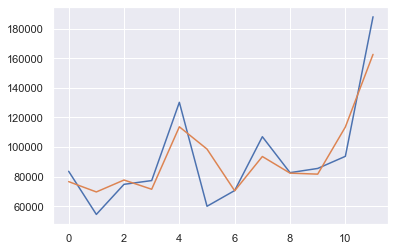

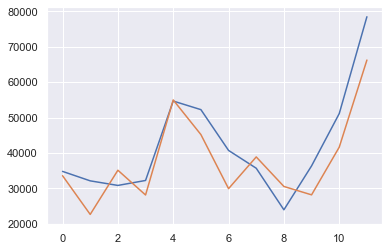

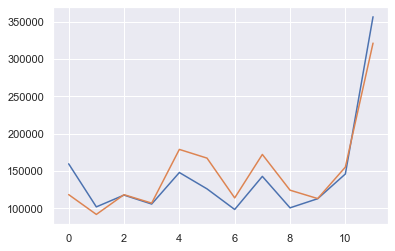

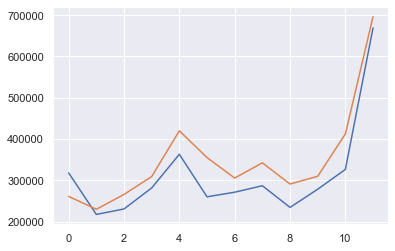

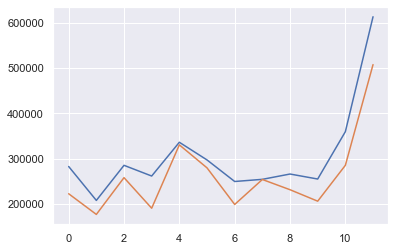

In [104]:
# datasets por loja 
# !!! tem lojas com meses faltando !!!

faturamentos_lojas = [ faturamento[24*i:24*i+24] for i in range(3131)]

print(faturamentos_lojas[9]['mes'])

#pegando lojas aleatorias
for i in range(5):
    rand = np.random.randint(0, 3131)
    #plot something
    fig, ax = plt.subplots()
    dataframe_loja = faturamentos_lojas[rand]
    #print(dataframe_loja)
    dataframe_loja['receita'][:12].reset_index(drop=True).plot(kind='line', ax=ax)
    dataframe_loja['receita'][12:].reset_index(drop=True).plot(kind='line', ax=ax)
    plt.show()


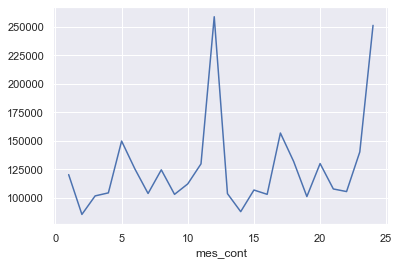

TypeError: 'AxesSubplot' object is not subscriptable

In [106]:
# analise global , media da receita das lojas ao longo do tempo

fig, ax = plt.subplots()
faturamanto_receita_media = faturamento.groupby('mes_cont')['receita'].mean().plot(kind='line', ax=ax)
plt.show()

# diferenca media entre os anos
faturamanto_receita_media_2016 = faturamanto_receita_media[:13]
faturamanto_receita_media_2017 = faturamanto_receita_media[13:]

In [66]:
print('Lojas com geo desconhecido (-1) - média geral: {}'.format(faturamento[faturamento['cod_ap'] == '-1']['receita'].mean()))
print('Lojas com geo desconhecido - std geral: {}'.format(faturamento[faturamento['cod_ap'] == '-1']['receita'].std()))
print('----------------')
print('Lojas com geo conhecido - média geral: {}'.format(faturamento[faturamento['cod_ap'] != '-1']['receita'].mean()))
print('Lojas com geo conhecido - std geral: {}'.format(faturamento[faturamento['cod_ap'] != '-1']['receita'].std()))

# no conjunto de lojas -1 a media eh menor(mas parece bem pouco) e a variancia eh maior (talvez seja reelvante aqui)

# plotar as distribuicoes das receitas
receitas_geo_desconhecido = faturamento[faturamento['cod_ap'] == '-1']['receita']                                      
receitas_geo_conhecido = faturamento[faturamento['cod_ap'] != '-1']['receita']



Lojas com geo desconhecido (-1) - média geral: 121217.22053182466
Lojas com geo desconhecido - std geral: 124688.15931468245
----------------
Lojas com geo conhecido - média geral: 127442.05033504874
Lojas com geo conhecido - std geral: 115429.49090320978


In [67]:
# rows which features from 13 to 18 are NaN

print('Lojas com NaN - média geral: {}'.format(faturamento[faturamento['feature_14'] != faturamento['feature_14']]['receita'].mean()))
print('Lojas com NaN - std geral: {}'.format(faturamento[faturamento['feature_14'] != faturamento['feature_14']]['receita'].std()))
print('----------------')
print('Lojas com features -  média geral:{}'.format(faturamento[faturamento['feature_14'] == faturamento['feature_14']]['receita'].mean()))
print('Lojas com features -  std geral:{}'.format(faturamento[faturamento['feature_14'] == faturamento['feature_14']]['receita'].std()))

#IMPORTANTE: Lojas que NaN nas features 13-18 tem receita mt menor!
# lojas quiosque talvez ?

# plotar as dsitribuicoes das receitas
# ver se as features estao influenciado a receita em faturamento_features_conhecidas (plotar)

receitas_features_NaN = faturamento[faturamento['feature_14'] != faturamento['feature_14']]['receita']
receitas_features_conhecidas = faturamento[faturamento['feature_14'] == faturamento['feature_14']]['receita']

Lojas com NaN - média geral: 97400.91578555842
Lojas com NaN - std geral: 87824.21873415788
----------------
Lojas com features -  média geral:201956.95852785336
Lojas com features -  std geral:141409.39768947635


In [68]:
# influencia do numero de lojas na regiao
receita_regiao = faturamento.groupby('cod_ap').aggregate({'cod_loja': 'count','receita': 'mean'})
receita_regiao

,cod_loja,receita
cod_ap,,
-1,3624,121217.220532
1100015001001,24,49665.950417
1100023003001,48,103779.700000
1100023003003,24,171428.721250
1100049003003,48,134509.871875
...,...,...
5300108005042,48,92232.147500
5300108005043,24,202715.029167
5300108005045,24,24997.535000


In [99]:
# target-value - receita
# Tem duas temporadas mesmo de receita? uma no meio do ano e outra no final? 
    #-> daria pra colocar feature binaria pros meses do meio do ano
# o ano eh importante?
# testar sazonalidade de trimestre 
# sazonalidade da receita pode ser diferente para cada loja/regiao/categoria?
#a avliar isso para a media de todas as lojas, media de todas as lojas por regiao
# 

75120

In [70]:
# lojas grandes e lojas normais? Existem grupos de lojas?

In [71]:
# ver o comportamento de tipos de categorias presentes em cada mês 

In [72]:
# como as categorias diferem em vendas e receita, e preço consequentemente?

In [73]:
# como preço da categorias varia durante o tempo?  Inflação importante? 

In [74]:
# agr sobre as features das lojas

# features 7 e 8 bem parecidas?
# feature 9 parece ter dois grupos definidos, um de valores maiores e outro de valores menores , ver isso aí
# se features 13-18 sao influentes (pq sempre que elas aparecem, aparecem juntas), e um binario nao eh suficiente:
    # feature 15 parece ter valores discretos bem definidos, relacionada a fração de alguma coisa, tipo x/10 * 1000 -> substituir por números de 1 a 10? Dividir em grupos maiores?
    # fature 16 parece ser binária, 500 ou 1000, tratar como binária? ou 1 e 2 ?
    # features 13, 15, 16 tem os valores máximos = moda = 1000 , colocar features binárias para a presença de max?
    # feature 4 parece ter 2 grupos de valores: altos e normais. Talvez a questao de lojas grande e normais?

In [75]:
# automatic feature generayion pras features 1-12 (1 - 18 se as features  13-18 forem necessarias)

In [76]:
# clustering (K-means with PCA / t-SNE)

In [77]:
# EDA time series stuff (target variable time-series anlysis)
# Scipy 2019 tutorial



In [78]:
# Subsitute Missing Values

In [79]:
# Treat Outliers

In [80]:
# feature selection and engineering   
    # - sabemos de antemao a "cara" dos resultados no comeco de ano pq a easonalidade é mt forte e a variancia eh pequena para meses
    # - por isso seria bom dar uma forma dele copiar um pouco o ano passo, serve como uma proxy
    # - feature categorica que vale: 'Janeiro'; 'Fevereiro', 'Marco', 'Outros'
    
    # feature binaria que vale 1 se as features 13 a 18 estao presentes e 0 caso contrario
    
    # feature trimestral, comeco do ano, meio, final
    
    # feature de numero de lojas na mesmo cod_ap 
    
    # rotacionar latitude e longitude -> ajuda o modelo de arvore

In [81]:
# Encode Categorical Values
 # mean encodings (pure or rounded)

In [82]:
# build lag_dataset (with lag variables/sliding window)

In [83]:
# build receita_diff (differentiated time series of target value)
# plot it

In [84]:
# lembrandoque vamos fazer a previsao do mes seguinte só, depois repetimos o mesmo processo para os proximos meses
# train-test split 
# test set vai ser os ultimos 3 meses

In [85]:
# local cross validation function
     # lembrar de fazer sort by loja, pra fazer um stack das predictions [loja1: outubro2017 loja2: outubro2017 ...]
     # pq na hora de fazer as previsoes vamos empacotar desse jeito

In [86]:
# global cross validation function (next three months)
    # prediction
    # for i in range(1,3):
    # faturamento_i+1 = append do train_i com prediction_i
    # fazer tudo denovo
        # train test split deixando ultimos 3 meses de fora
        # treinar e cv modelos, treinar e cv ensemble, treinar modelos no dataset inteiro, treinar e cv ensemble no dataset inteiro
        # conseguir prediction_i 
        # append prediction_i no prediction_months
    # if cv=True 
        #call local cross validation and return cv 
    # else 
        #return prediction_months

In [87]:
# baseline model 1

# 0. Separar dataset para cada loja
# 1. Fazer 2017 - 2016
# 2. plotar 
# 3. fit and predict with ARIMA (diff = 1)
# 5. somar valor obtido com 2016
# 6. juntar as predictions
# 4. cv ARIMA

In [88]:
# baseline model 2

# 0. Separar dataset para cada loja
# 1. fit and predict with ARIMA (diff = 1 )
# 2. somar com valor do mes passado
# 3  juntar predtions
# 4. cv ARIMA

In [89]:
# xgboost with lag dataset

In [90]:
# train xgboost with lag dataset parameter tuning

In [91]:
# cv xgboost

In [92]:
# train other models
 # remember that with linear models we have to normalize variables

In [93]:
# other models parameter tuning (if needed)

In [94]:
# cv other models

In [95]:
# ensemble

In [96]:
# cv ensemble

In [97]:
# get parameters of ensemble, train models again on whole dataset

In [98]:
# make predictions wth global cv function (cv=False) for submission